# ***Engr.Muhammad Javed***

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('files/Real estate.csv')
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
data.isnull().sum()

# no null values in this dataframe

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [4]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
data.duplicated().sum()

# there are no duplicates in this dataset

np.int64(0)

In [6]:
# now checking columns
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
# the serial numbers are unique, so that we cannot find duplicates from this dataset.
data.drop("No", axis=1, inplace=True)

# axis 1 is used for column and 0 is used for row.

In [8]:
data.duplicated().sum()
# now we are sure that there are no duplicates in this dataset

np.int64(0)

In [ ]:
# # for removing duplicates, we can use:
# data.drop_duplicates(inplace=True)

In [10]:
# renaming column names
data.rename(columns={
    "X1 transaction date": "TransactionDate",
    "X2 house age":"House_Age",
    "X3 distance to the nearest MRT station": "DistanceToMRT",
    "X4 number of convenience stores":"NumConvenienceStores",
    "X5 latitude":"Latitude",
    "X6 longitude":"Longitude",
    "Y house price of unit area":"HousePricePerUnit"
}, inplace=True)
data.head()

,TransactionDate,House_Age,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,HousePricePerUnit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Text(0.5, 0, 'price')

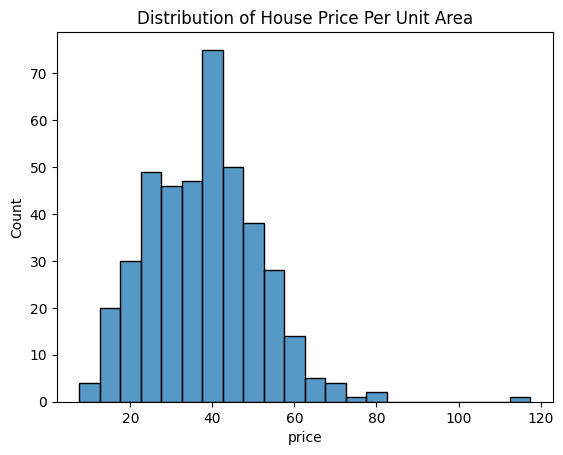

In [11]:
sb.histplot(data.HousePricePerUnit)
plt.title("Distribution of House Price Per Unit Area")
plt.xlabel("price")

Text(0.5, 1.0, 'Correlation heatmap')

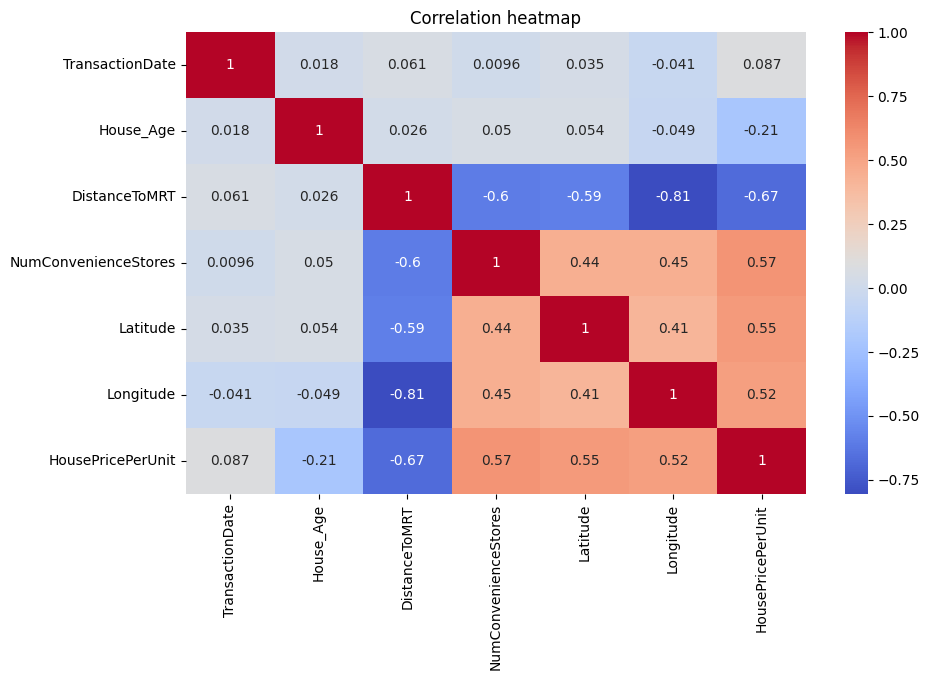

In [12]:
plt.figure(figsize=(10,6))
sb.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")

In [14]:
#  Does proximity to MRT stations affect house prices?
correlation_mrt_price = data["DistanceToMRT"].corr(data["HousePricePerUnit"])
correlation_mrt_price

np.float64(-0.6736128553689182)

Text(0.5, 0, 'Distance to MRT')

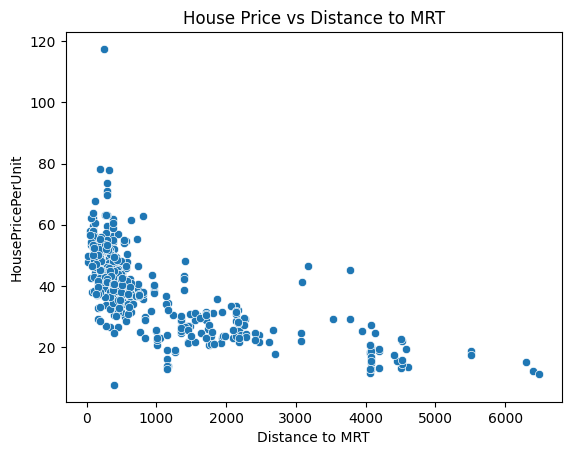

In [18]:
sb.scatterplot(data, x="DistanceToMRT",y="HousePricePerUnit")
plt.title("House Price vs Distance to MRT")
plt.xlabel("Distance to MRT")

In [ ]:
# Is there a correlation between number of convenience stores and house prices

In [ ]:
# Does house age negatively impact price?


In [ ]:
# Are there any seasonal (monthly) patterns in house pricing
